`-` 링크

https://school.programmers.co.kr/learn/courses/30/lessons/258711

`-` 문제

도넛 모양 그래프, 막대 모양 그래프, 8자 모양 그래프들이 있습니다. 이 그래프들은 1개 이상의 정점과, 정점들을 연결하는 단방향 간선으로 이루어져 있습니다.

크기가 n인 도넛 모양 그래프는 n개의 정점과 n개의 간선이 있습니다. 도넛 모양 그래프의 아무 한 정점에서 출발해 이용한 적 없는 간선을 계속 따라가면 나머지 n-1개의 정점들을 한 번씩 방문한 뒤 원래 출발했던 정점으로 돌아오게 됩니다. 도넛 모양 그래프의 형태는 다음과 같습니다.

크기가 n인 막대 모양 그래프는 n개의 정점과 n-1개의 간선이 있습니다. 막대 모양 그래프는 임의의 한 정점에서 출발해 간선을 계속 따라가면 나머지 n-1개의 정점을 한 번씩 방문하게 되는 정점이 단 하나 존재합니다. 막대 모양 그래프의 형태는 다음과 같습니다.

크기가 n인 8자 모양 그래프는 2n+1개의 정점과 2n+2개의 간선이 있습니다. 8자 모양 그래프는 크기가 동일한 2개의 도넛 모양 그래프에서 정점을 하나씩 골라 결합시킨 형태의 그래프입니다. 8자 모양 그래프의 형태는 다음과 같습니다.

도넛 모양 그래프, 막대 모양 그래프, 8자 모양 그래프가 여러 개 있습니다. 이 그래프들과 무관한 정점을 하나 생성한 뒤, 각 도넛 모양 그래프, 막대 모양 그래프, 8자 모양 그래프의 임의의 정점 하나로 향하는 간선들을 연결했습니다.

그 후 각 정점에 서로 다른 번호를 매겼습니다.

이때 당신은 그래프의 간선 정보가 주어지면 생성한 정점의 번호와 정점을 생성하기 전 도넛 모양 그래프의 수, 막대 모양 그래프의 수, 8자 모양 그래프의 수를 구해야 합니다.

그래프의 간선 정보를 담은 2차원 정수 배열 edges가 매개변수로 주어집니다. 이때, 생성한 정점의 번호, 도넛 모양 그래프의 수, 막대 모양 그래프의 수, 8자 모양 그래프의 수를 순서대로 1차원 정수 배열에 담아 return 하도록 solution 함수를 완성해 주세요.

제한사항

1 ≤ edges의 길이 ≤ 1,000,000

edges의 원소는 [a,b] 형태이며, a번 정점에서 b번 정점으로 향하는 간선이 있다는 것을 나타냅니다.

1 ≤ a, b ≤ 1,000,000

문제의 조건에 맞는 그래프가 주어집니다.

도넛 모양 그래프, 막대 모양 그래프, 8자 모양 그래프의 수의 합은 2이상입니다.

`-` 답

- 힌트를 얻음.

In [411]:
def solution(edges):
    matrix = [[0 for _ in range(len(edges))] for _ in range(len(edges))]

    for row, col in edges:
        matrix[row - 1][col - 1] = 1 

    # 나가는 선
    row_sums = []
    for i in range(len(matrix)):
        if sum(matrix[i]) == 0:
            row_sums.append(0)
        elif sum(matrix[i]) != 0:
            row_sums.append(sum(matrix[i]))

    #들어오는 선
    col_sums = [0] * len(matrix[0])
    for row in matrix:
        for j in range(len(row)):
            col_sums[j] += row[j]

    bar = 0
    eight = 0
    for i in range(len(matrix)):
        if col_sums[i] != 0 or row_sums[i] != 0:
            if row_sums[i] == 0 :
                bar += 1
            elif row_sums[i] > 1 and col_sums[i] == 0:
                정점 = i + 1
            elif row_sums[i] == 2 and col_sums[i] >= 2:
                eight += 1
    donut = row_sums[정점 - 1] - bar - eight
    
    answer = [정점, donut, bar, eight]
    return answer

입출력 예 #1

2번 정점이 생성한 정점이고 도넛 모양 그래프 1개, 막대 모양 그래프 1개가 존재합니다. 따라서 [2, 1, 1, 0]을 return 해야 합니다.

In [412]:
solution([[2, 3], [4, 3], [1, 1], [2, 1]])
# [2, 1, 1, 0]

[2, 1, 1, 0]

입출력 예 #2

4번 정점이 생성한 정점이고 막대 모양 그래프 1개, 8자 모양 그래프 2개가 존재합니다. 따라서 [4, 0, 1, 2]를 return 해야 합니다.

In [413]:
solution([[4, 11], [1, 12], [8, 3], [12, 7], [4, 2], [7, 11], [4, 8], [9, 6], [10, 11], [6, 10], [3, 5], [11, 1], [5, 3], [11, 9], [3, 8]])
# [4, 0, 1, 2]

[4, 0, 1, 2]

**코드상의 에러는 없으나 시간초과로 통과되지 못했다.**

`-` 한 줄씩

`-` 1번 예제

In [456]:
edges = [[2, 3], [4, 3], [1, 1], [2, 1]]

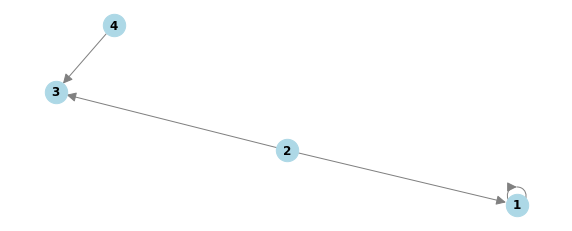

In [458]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(edges)

pos = nx.spring_layout(G) 
fig, ax = plt.subplots(figsize=(10, 4))  # 명시적으로 Figure와 Axes 생성
nx.draw(
    G, pos, ax=ax, with_labels=True, node_size=500, node_color='lightblue',
    font_size=12, font_weight='bold', edge_color='gray', arrowsize=20
)
plt.show()

In [459]:
matrix = [[0 for _ in range(len(edges))] for _ in range(len(edges))]

for row, col in edges:
    matrix[row - 1][col - 1] = 1  # 행과 열은 1부터 시작하므로 -1 처리

행렬을 만들어줬다.

In [460]:
matrix

[[1, 0, 0, 0], [1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 1, 0]]

나가는 선

In [461]:
row_sums = []
for i in range(len(matrix)):
    if sum(matrix[i]) == 0:
        row_sums.append(0)
    elif sum(matrix[i]) != 0:
        row_sums.append(sum(matrix[i]))
row_sums

[1, 2, 0, 1]

들어오는 선

In [462]:
col_sums = [0] * len(matrix[0])
for row in matrix:
    for j in range(len(row)):
        col_sums[j] += row[j]
col_sums

[2, 0, 2, 0]

In [463]:
bar = 0
eight = 0
for i in range(len(matrix)):
    if col_sums[i] != 0 or row_sums[i] != 0:
        if row_sums[i] == 0 :
            bar += 1
        elif row_sums[i] > 1 and col_sums[i] == 0:
            정점 = i + 1
        elif row_sums[i] == 2 and col_sums[i] >= 2:
            eight += 1
donut = row_sums[정점 - 1] - bar - eight
정점, donut, bar, eight

(2, 1, 1, 0)

크기가 n인 도넛 모양 그래프는 n개의 정점과 n개의 간선이 있습니다. 도넛 모양 그래프의 아무 한 정점에서 출발해 이용한 적 없는 간선을 계속 따라가면 나머지 n-1개의 정점들을 한 번씩 방문한 뒤 원래 출발했던 정점으로 돌아오게 됩니다.
- 정점이랑 이어진 점 빼고 나가는 간선의 수와 들어오는 간선의 수가 같다.


```python
# 크기
n = 1
# 정점 i = 2, 1개 정점
n = 1
# 간선
n = 1
# 방문하는 정점 수
n - 1 = 1
````

크기가 n인 막대 모양 그래프는 n개의 정점과 n-1개의 간선이 있습니다. 막대 모양 그래프는 임의의 한 정점에서 출발해 간선을 계속 따라가면 나머지 n-1개의 정점을 한 번씩 방문하게 되는 정점이 단 하나 존재합니다. 
- 정점이랑 이어진 점 빼고 나가는 간선만 있다.

```python
# 크기
n = 2
# 정점
n = 2
# 간선
n - 1 = 1
# 방문하는 정점 수
1
```

크기가 n인 8자 모양 그래프는 2n+1개의 정점과 2n+2개의 간선이 있습니다. 8자 모양 그래프는 크기가 동일한 2개의 도넛 모양 그래프에서 정점을 하나씩 골라 결합시킨 형태의 그래프입니다.

```python
# 크기
n
# 정점
2n + 1
# 간선
2n + 2
# 방문하는 정점 수

```

- 1번 노드(도넛)
    - 나가는 간선  = 1
    - 들어오는 간선 = 2 = 1 + 정점에서 오는 간선 1
    - 특징 나가는 간선이 1 
- 2번 노드(정점)
    - 나가는 간선  = 2
    - 들어오는 간선 = 0
    - 특징 나가는 간선이 2, 들어오는 간선이 0
- 3번 노드(막대)
    - 나가는 간선  = 0
    - 들어오는 간선 = 2
- 4번 노드(막대)
    - 나가는 간선  = 1
    - 들어오는 간선 = 0 
    - 나가는 간선만 존재
- 나가는 간선의 수가 0 이면 막대
    - 3번 노드
    - 따라서 1
- 나가는 간선의 수가 2 이상이고 들어오는 간선이 0 이면 정점
    - 2번 노드
    - 따라서 정점은 2번 노드
- 나가는 간선의 수가 2 이고 들어오는 간선의 수가 2 이상이면 8자
    - 없음
- 정점에서 나가는 간선의 수에서 막대, 8자 빼면 도넛
    - 2 - 1 - 1 = 0
    - 따라서 0

- 정점 2
- 도넛모양 1
- 막대 모양 1
- 8자 모양 0

`-` 2번 예제

In [444]:
edges = [[4, 11], [1, 12], [8, 3], [12, 7], [4, 2], [7, 11], [4, 8], [9, 6], [10, 11], [6, 10], [3, 5], [11, 1], [5, 3], [11, 9], [3, 8]]

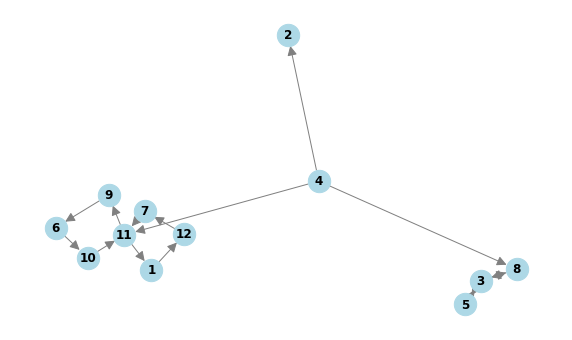

In [454]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(edges)

pos = nx.spring_layout(G) 
fig, ax = plt.subplots(figsize=(10, 6))  # 명시적으로 Figure와 Axes 생성
nx.draw(
    G, pos, ax=ax, with_labels=True, node_size=500, node_color='lightblue',
    font_size=12, font_weight='bold', edge_color='gray', arrowsize=20
)
plt.show()

4번 정점이 생성한 정점이고 막대 모양 그래프 1개, 8자 모양 그래프 2개가 존재합니다. 따라서 [4, 0, 1, 2]를 return 해야 합니다.

In [422]:
matrix = [[0 for _ in range(len(edges))] for _ in range(len(edges))]

for row, col in edges:
    matrix[row - 1][col - 1] = 1  # 행과 열은 1부터 시작하므로 -1 처리

나가는 선

In [423]:
row_sums = []
for i in range(len(matrix)):
    if sum(matrix[i]) == 0:
        row_sums.append(0)
    elif sum(matrix[i]) != 0:
        row_sums.append(sum(matrix[i]))
row_sums

[1, 0, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0]

들어오는 선

In [424]:
col_sums = [0] * len(matrix[0])
for row in matrix:
    for j in range(len(row)):
        col_sums[j] += row[j]
col_sums

[1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 3, 1, 0, 0, 0]

In [425]:
bar = 0
eight = 0
for i in range(len(matrix)):
    if col_sums[i] != 0 or row_sums[i] != 0:
        if row_sums[i] == 0 :
            bar += 1
        elif row_sums[i] > 1 and col_sums[i] == 0:
            정점 = i + 1
        elif row_sums[i] == 2 and col_sums[i] >= 2:
            eight += 1
donut = row_sums[정점 - 1] - bar - eight
정점, donut, bar, eight

(4, 0, 1, 2)

크기가 n인 도넛 모양 그래프는 n개의 정점과 n개의 간선이 있습니다. 도넛 모양 그래프의 아무 한 정점에서 출발해 이용한 적 없는 간선을 계속 따라가면 나머지 n-1개의 정점들을 한 번씩 방문한 뒤 원래 출발했던 정점으로 돌아오게 됩니다.
- 정점이랑 이어진 점 빼고 나가는 간선의 수와 들어오는 간선의 수가 같다.


```python
# 크기
n
# 정점 i = 4, 1개 정점
n
# 간선
n
# 방문하는 정점 수
n - 1
````

크기가 n인 막대 모양 그래프는 n개의 정점과 n-1개의 간선이 있습니다. 막대 모양 그래프는 임의의 한 정점에서 출발해 간선을 계속 따라가면 나머지 n-1개의 정점을 한 번씩 방문하게 되는 정점이 단 하나 존재합니다. 
- 정점이랑 이어진 점 빼고 나가는 간선만 있다.

```python
# 크기
n = 2
# 정점
n = 2
# 간선
n - 1 = 1
# 방문하는 정점 수
1
```

크기가 n인 8자 모양 그래프는 2n+1개의 정점과 2n+2개의 간선이 있습니다. 8자 모양 그래프는 크기가 동일한 2개의 도넛 모양 그래프에서 정점을 하나씩 골라 결합시킨 형태의 그래프입니다.

```python
# 크기
n
# 정점
2n + 1
# 간선
2n + 2
# 방문하는 정점 수

```

- 1번 노드
    - 나가는 간선  = 1
    - 들어오는 간선 = 1
- 2번 노드
    - 나가는 간선  = 0
    - 들어오는 간선 = 1
- 3번 노드 
    - 나가는 간선  = 2
    - 들어오는 간선 = 2
- 4번 노드
    - 나가는 간선  = 3
    - 들어오는 간선 = 0 
- 5번 노드
    - 나가는 간선  = 1
    - 들어오는 간선 = 1
- 6번 노드
    - 나가는 간선  = 1
    - 들어오는 간선 = 1
- 7번 노드 
    - 나가는 간선  = 1
    - 들어오는 간선 = 1
- 8번 노드
    - 나가는 간선  = 1
    - 들어오는 간선 = 2
- 9번 노드
    - 나가는 간선  = 1
    - 들어오는 간선 = 1
- 10번 노드
    - 나가는 간선  = 1
    - 들어오는 간선 = 1
- 11번 노드 
    - 나가는 간선  = 2
    - 들어오는 간선 = 3
- 12번 노드
    - 나가는 간선  = 1
    - 들어오는 간선 = 1 
- 나가는 간선의 수가 0 이면 막대
    - 2번 노드
    - 따라서 1
- 나가는 간선의 수가 2 이상이고 들어오는 간선이 0 이면 정점
    - 4번 노드
    - 따라서 정점은 4번 노드
- 나가는 간선의 수가 2 이고 들어오는 간선의 수가 2 이상이면 8자
    - 3번 노드
    - 11번 노드
    - 따라서 2
- 정점에서 나가는 간선의 수에서 막대, 8자 빼면 도넛
    - 3 - 1 - 2 = 0
    - 따라서 0

- 정점 4
- 도넛모양 0
- 막대 모양 1
- 8자 모양 2

`-` ChatGPT 가 정리한 효율적인 답

In [5]:
def solution(edges):
    n = max(max(row, col) for row, col in edges)
    
    row_sums = [0] * n
    col_sums = [0] * n

    for row, col in edges:
        row_sums[row - 1] += 1
        col_sums[col - 1] += 1

    bar, eight, vertex = 0, 0, -1

    for i in range(n):
        if row_sums[i] == 0 and col_sums[i] > 0:
            bar += 1
        elif row_sums[i] > 1 and col_sums[i] == 0:
            vertex = i + 1
        elif row_sums[i] == 2 and col_sums[i] >= 2:
            eight += 1

    donut = row_sums[vertex - 1] - bar - eight if vertex != -1 else 0

    return [vertex, donut, bar, eight]

In [6]:
solution([[2, 3], [4, 3], [1, 1], [2, 1]])
# [2, 1, 1, 0]

[2, 1, 1, 0]

In [7]:
solution([[4, 11], [1, 12], [8, 3], [12, 7], [4, 2], [7, 11], [4, 8], [9, 6], [10, 11], [6, 10], [3, 5], [11, 1], [5, 3], [11, 9], [3, 8]])
# [4, 0, 1, 2]

[4, 0, 1, 2]

주요 개선 사항

1. 메모리 절약 및 효율적인 초기화:
- 그래프의 크기를 동적으로 계산하여, 불필요한 n x n 행렬 초기화를 제거했습니다.
2. 중복 계산 제거:
- row_sums와 col_sums를 바로 계산하여, 행렬 탐색 과정을 줄였습니다.
3. 로직 단순화:
- bar, eight, vertex의 계산이 더 명확하고 간결하게 작성되었습니다.
4. 가독성 향상:
- 변수 이름을 유지하며 코드 블록을 논리적 흐름에 맞게 배치했습니다.

예 1

In [11]:
edges = [[2, 3], [4, 3], [1, 1], [2, 1]]

몇 행 몇 열의 데이터일지

In [12]:
n = max(max(row, col) for row, col in edges)
n

4

행렬 구성

In [13]:
row_sums = [0] * n
col_sums = [0] * n
row_sums,col_sums

([0, 0, 0, 0], [0, 0, 0, 0])

입력 값으로 들어오는 간선의 수와 나가는 간선의 수 구하기

In [14]:
for row, col in edges:
    row_sums[row - 1] += 1
    col_sums[col - 1] += 1
row_sums, col_sums

([1, 2, 0, 1], [2, 0, 2, 0])

들어오는 간선의 수와 나가는 간선의 수로 정점, 막대, 8자 도형 찾기

In [15]:
bar, eight, vertex = 0, 0, -1

for i in range(n):
    if row_sums[i] == 0 and col_sums[i] > 0:
        bar += 1
    elif row_sums[i] > 1 and col_sums[i] == 0:
        vertex = i + 1
    elif row_sums[i] == 2 and col_sums[i] >= 2:
        eight += 1
bar, eight, vertex

(1, 0, 2)

정점에서 나가는 간선의 수는 도형의 총 개수이니까 정점에서 나가는 수에서 위애서 구한 막대, 8자 도형의 수 빼기

In [16]:
donut = row_sums[vertex - 1] - bar - eight if vertex != -1 else 0
donut

1

예 2

In [17]:
edges = [[4, 11], [1, 12], [8, 3], [12, 7], [4, 2], [7, 11], [4, 8], [9, 6], [10, 11], [6, 10], [3, 5], [11, 1], [5, 3], [11, 9], [3, 8]]

In [18]:
n = max(max(row, col) for row, col in edges)
n

12

In [19]:
row_sums = [0] * n
col_sums = [0] * n
row_sums, col_sums

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
for row, col in edges:
    row_sums[row - 1] += 1
    col_sums[col - 1] += 1
row_sums, col_sums

([1, 0, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1], [1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 3, 1])

In [21]:
bar, eight, vertex = 0, 0, -1

for i in range(n):
    if row_sums[i] == 0 and col_sums[i] > 0:
        bar += 1
    elif row_sums[i] > 1 and col_sums[i] == 0:
        vertex = i + 1
    elif row_sums[i] == 2 and col_sums[i] >= 2:
        eight += 1
bar, eight, vertex

(1, 2, 4)

In [22]:
donut = row_sums[vertex - 1] - bar - eight if vertex != -1 else 0
donut

0